In [1]:
import pandas as pd
import numpy as np

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [179]:
train = pd.read_csv('titanic_train.csv')
test = pd.read_csv('titanic_test.csv')

In [180]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


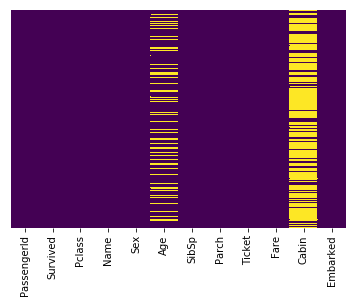

In [8]:
sns.heatmap(train.isnull(), yticklabels=False, cmap='viridis', cbar=False)

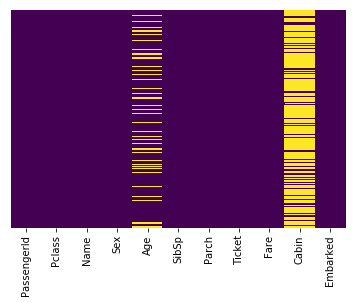

In [33]:
sns.heatmap(test.isnull(), yticklabels=False, cmap='viridis', cbar=False)

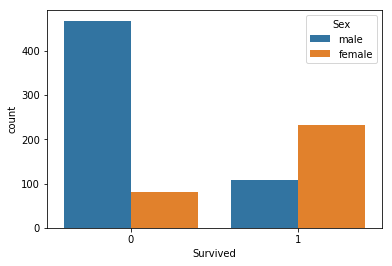

In [13]:
sns.countplot(x='Survived', data=train, hue='Sex')

In [36]:
test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

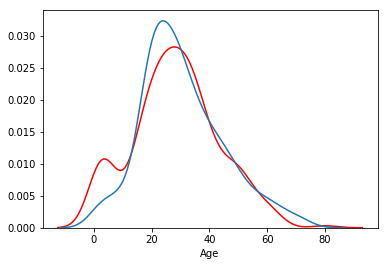

In [54]:
sns.distplot(train[train['Survived'] == 1]['Age'].dropna(), hist=False, bins=40, color='r')
sns.distplot(train[train['Survived'] == 0]['Age'].dropna(), hist=False, bins=40)


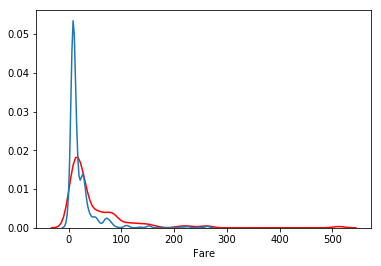

In [55]:
sns.distplot(train[train['Survived'] == 1]['Fare'], hist=False, bins=40, color='r')
sns.distplot(train[train['Survived'] == 0]['Fare'], hist=False, bins=40)

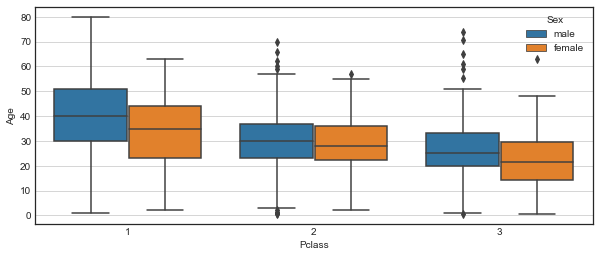

In [77]:
plt.figure(figsize=(10, 4))
sns.set_style('white', rc={'axes.grid': True})
sns.boxplot(x='Pclass', y='Age', data=train, hue='Sex')

you can use sns.axes_style() to return all the styling of the axes and then you can override them with set_style()

In [152]:
# we can read the age mean age value for each category but if you want to be very precise!
for pclass in [1, 2, 3]:
    for sex in ['male', 'female']:
        print(pclass, sex, round(train[(train['Pclass']==pclass) & (train['Sex']==sex)]['Age'].mean(), 2))

1 male 41.28
1 female 34.61
2 male 30.74
2 female 28.72
3 male 26.51
3 female 21.75


in order to define our impute function, the best way is to create a nice structured object to avoid many 'if' estatements

In [153]:
age_class = {1:{'male': 41.28, 'female': 34.61}, 2: {'male': 30.74, 'female': 28.72}, 3: {'male': 25.51, 'female': 21.7}}

In [181]:
def impute_age(cols):
    Age, Pclass, Sex = tuple(cols)
    
    if pd.isnull(Age):
        return age_class[Pclass][Sex]
#        if pclass==1 and sex=='male': return 41.28
#        elif pclass==1 and sex=='female': return 34.61
#        elif pclass==2 and sex=='male': return 30.74
#        elif pclass==2 and sex=='female': return 28.72
#        elif pclass==3 and sex=='male': return 26.51
#        else:
#            return 21.75
    else:
        return Age
train['Age'] = train[['Age', 'Pclass', 'Sex']].apply(impute_age, axis=1)

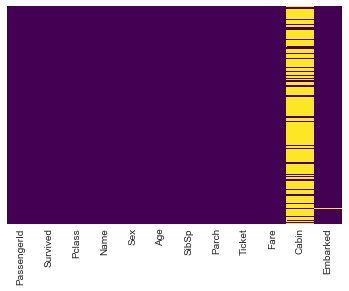

In [182]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [183]:
train.drop('Cabin', axis=1, inplace=True)

In [184]:
train.dropna(inplace=True)

In [185]:
train = pd.get_dummies(train, columns=['Sex', 'Embarked'], drop_first=True)

In [186]:
train.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,1,0,1


In [187]:
train.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

In [188]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


we will not use test dataset because it is basically for kaggle competition. But, let's take a look at it

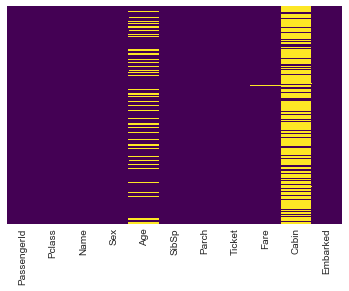

In [189]:
sns.heatmap(test.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [190]:
test['Age'] = test[['Age', 'Pclass', 'Sex']].apply(impute_age, axis=1)

In [191]:
test.drop('Cabin', axis=1, inplace=True)

In [192]:
test.dropna(inplace=True)

We need to convert categorical columns to numerical values using dummy variables

In [194]:
test = pd.get_dummies(test, columns=['Sex', 'Embarked'], drop_first=True)

In [196]:
test.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

In [202]:
X = train.drop('Survived', axis=1)
y = train['Survived']

In [201]:
from sklearn.model_selection import train_test_split

In [203]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [204]:
from sklearn.linear_model import LogisticRegression

In [205]:
logreg = LogisticRegression()

In [206]:
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [207]:
predictions = logreg.predict(X_test)

In [208]:
from sklearn.metrics import confusion_matrix, classification_report

In [228]:
con_mat = np.array([['TN', 'FP'],
                    ['FN', 'TP']])

pd.DataFrame(data=con_mat, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])

,Predicted 0,Predicted 1
Actual 0,TN,FP
Actual 1,FN,TP


if you go horizontally, you can calculate recall, and vertically yeilds the precision value. avg/Total is the accuracy

In [211]:
confusion_matrix(y_test, predictions) 

array([[144,  23],
       [ 31,  69]], dtype=int64)

In [213]:
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

          0       0.82      0.86      0.84       167
          1       0.75      0.69      0.72       100

avg / total       0.80      0.80      0.80       267

